Nama : Sausan<br>
Grup : DS2

Link: https://colab.research.google.com/drive/1cdpqpVYYf9BYwjGa-WvSaUG5jdwNlZXl?usp=sharing

##Day 4

Kamis, 19 Oktober 2023

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#koneksi dari COLAB ke Gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data to colab
path= '/content/drive/MyDrive/DataSource/Chapter06DataSet.csv'
load_data_res=pd.read_csv(path)
df=pd.DataFrame(load_data_res)
df.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


##Business Understanding

Sabarudin Hidayah is a program director for a major health insurance provider. Recently he has been reading in medical journals and other articles, and found a strong emphasis on the influence of weight, gender and cholesterol on the development of coronary heart disease. The research he’s read confirms time after time that there is a connection between these three variables, and while there is little that can be done about one’s gender, there are certainly life choices that can be made to alter one’s cholesterol and weight. He begins brainstorming ideas for his company to offer weight and cholesterol management programs to individuals who receive health insurance through his employer. As he considers where his efforts might be most effective, he finds herself wondering if there are natural groups of individuals who are most at risk for high weight and high cholesterol, and if there are such groups, where the natural dividing lines between the groups occur.

**Problem:** Clustering -- Unsupervised Learning

**GOAL:** Prediktif Tingkat Resiko Jantung Koroner dengan Metode Clustering

**Algoritma:** K-Means

##Data Understanding

In [ ]:
df

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Cholesterol', 'Gender'], **{})
chart

<Figure size 600x600 with 0 Axes>

##Analisis Kolesterol

**Kolesterol Total:**
Normal : Kurang dari 200 mg/dL (miligram per desiliter) atau 5.2 mmol/L (milimol per liter).  <br>
Tidak Normal : 200 mg/dL atau lebih.

**Koleterol LDL (Low-Density Lipoprotein, disebut juga "kolesterol jahat"):**
Normal: Kurang dari 100 mg/dL atau 2.6 mmol/L. <br>
Tidak Normal : 100 mg/dL atau lebih.

**Kolesterol HDL (High-Density Lipoprotein, disebut juga "kolesterol baik"):**
Normal (tinggi) : 60 mg/dL atau lebih dianggap baik untuk kesehatan jantung. <br>
Tidak Normal : kurang dari 40 mg/dL pada pria atau kurang dari 50 mg/dL pada wanita dianggap rendah.

In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Cholesterol'], **{})
chart

##Kolesterol Berdasarkan Jumlah Nasabah

1. Ada lebih dari 50 nasabah asuransi yang teridentifikasi high cholestrol, dari grafik ditunjukkan pada range angka 20 sampai 239.

In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Weight', 'Cholesterol'], **{})
chart

<Figure size 600x600 with 0 Axes>

##Kolesterol dan Weight

Ada pola hubungan berbanding lurus antara kolesterol dan weight. Artinya, jika weight bertambah maka kolestrolnya bertambah.

In [ ]:
chart = scatter_plot(df, *['Gender', 'Cholesterol'], **{})
chart

<Figure size 600x600 with 0 Axes>

##Kolesterol dan Gender

Antara laki-laki dan perempuan memiliki kesamaan. Artinya sama-sama berpeluang kolesterol tinggi.

In [ ]:
#melihat info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Weight       547 non-null    int64
 1   Cholesterol  547 non-null    int64
 2   Gender       547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [ ]:
#menghitung jumlah missing value
df.isnull().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

##Tidak dilakukan preparation data, karna data dalam keadaan bersih dan memiliki tipe data numerik sesuai dengan algortimanya

##Pemodelan Data dengan Clustering

##Evaluasi Clustering

1. Dibutuhkan untuk menentukan berapa nilai K yang akan di input ke dalam n_cluster
2. Akan digunakan teknik elbow methodologi untuk menentukan nilai K yang optimum

In [ ]:
from sklearn.cluster import KMeans
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#menentukan input variabel
x=df[['Weight', 'Cholesterol', 'Gender']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

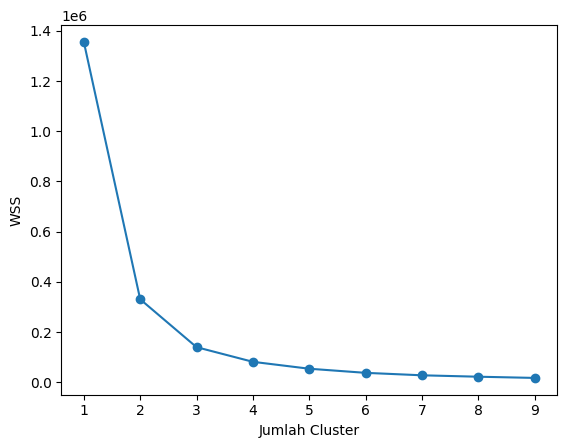

In [ ]:
#elbow method
cluster_range=range(1,10)
cluster_wss=[]

for num_cluster in cluster_range:
  clusters=KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker='o')
plt.show()

#Elbow Method
Adalah salah satu teknik untuk menentukan n cluster, dimana n adalah nilai terbaik


WSS = Within-Cluster Sum of Squares. Merupakan metrix yang digunakan untuk mengukur cluster

Nilai n cluster terbaik versi Elbow Method : 3 sampai 4

##Clustering K-Means

In [ ]:
cls=KMeans(n_clusters=4, random_state=0)

#membentuk model
model_cls=cls.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster']=model_cls.labels_
df.head()

,Weight,Cholesterol,Gender,cluster
0,102,111,1,1
1,115,135,1,1
2,115,136,1,1
3,140,167,0,2
4,130,158,1,2


In [ ]:
df['cluster'].value_counts()

1    152
0    147
2    140
3    108
Name: cluster, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x="Weight", y="Cholesterol", color="cluster",
                 size='Weight', hover_data=['Cholesterol'])
fig.show()

##Hasil Cluster

Didapatkan 4 kelompok orang yang beresiko jantung koroner. Berikut ini kelompok cluster berdasarkan resiko:
1. Cluster 0 : Cluster High Risk : adalah kelompok nasabah yang memiliki resiko tinggi jantung koroner <br>
2. Cluster 3 :  Cluster Potentional High Risk : adalah kelompok nasabah yang memiliki kecenderungan resiko tinggi jantung koroner. Hal ini ditunjukkan cholesterol dan weight berada pada ambang batas normal. <br>
3. Cluster 2 : Cluster Moderat : adalah kelompok nasabah yang berada diantara low risk dan potentional risk. <br>
4. Cluster 1 : Cluster Low Risk : adalah kelompok nasabah yang memiliki resiko rendah, cholesterol rendah dan weight juga rendah.


Berapakah jumlah nasabah yang akan di prospek untuk mengikuti program baru "TREATMENT" untuk mengurangi resiko jantung koroner?

Penjumlahan Cluster 0 dan Cluster 3.

147 + 108 = 255 nasabah